<a href="https://colab.research.google.com/github/ApahSaroj/WPI/blob/main/Fast_AI_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from fastai.tabular import *

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#importing the dataset
dataset = pd.read_excel('/content/drive/MyDrive/DATA/WQC_test.xlsx')

In [4]:
dataset=dataset.dropna()
dataset

,Unnamed: 0,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI,WQC
0,0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528,Excellent
1,1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400,Excellent
2,2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814,Excellent
3,3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.60,0.299590,2.238750,0.01536,0.219282,Excellent
4,4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,482,7.60,5.6,224.0,8.0,370.0,16.14,92.0,24.0,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630,Excellent
483,483,7.30,5.6,266.0,96.0,434.0,20.56,96.0,32.0,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996,Excellent
484,484,5.10,5.8,290.0,12.0,487.0,37.35,60.0,44.0,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811,Excellent
485,485,7.40,6.4,230.0,72.0,385.0,20.06,70.0,42.0,10.35,1.360,32.92,7.110435,48.500000,0.21900,0.509970,Good


In [5]:
df = dataset.iloc[:,1:17]
df

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI,WQC
0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528,Excellent
1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400,Excellent
2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814,Excellent
3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.60,0.299590,2.238750,0.01536,0.219282,Excellent
4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,7.60,5.6,224.0,8.0,370.0,16.14,92.0,24.0,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630,Excellent
483,7.30,5.6,266.0,96.0,434.0,20.56,96.0,32.0,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996,Excellent
484,5.10,5.8,290.0,12.0,487.0,37.35,60.0,44.0,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811,Excellent
485,7.40,6.4,230.0,72.0,385.0,20.06,70.0,42.0,10.35,1.360,32.92,7.110435,48.500000,0.21900,0.509970,Good


In [6]:
training_set = df

In [7]:
training_set.head(5)

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI,WQC
0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.8,0.758000,6.534660,0.06211,0.249528,Excellent
1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.8,0.196062,8.138620,0.00960,0.216400,Excellent
2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.8,0.298875,3.855625,0.01280,0.183814,Excellent
3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.6,0.299590,2.238750,0.01536,0.219282,Excellent
4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.3,0.106000,5.600000,0.01000,0.165831,Excellent


In [8]:
# Checking the number of rows
print("\n\nNumber of observations in the datasets :\n",'#' * 40)

print("\nTraining Set : ",len(training_set))


# checking the number of features in the Datasets
print("\n\nNumber of features in the datasets :\n",'#' * 40)

print("\nTraining Set : ",len(training_set.columns))


# checking the features in the Datasets
print("\n\nFeatures in the datasets :\n",'#' * 40)

print("\nTraining Set : ", list(training_set.columns))


# Checking the data types of features
print("\n\nDatatypes of features in the datasets :\n",'#' * 40)

print("\nTraining Set : ", training_set.dtypes)


# checking for NaNs or empty cells
print("\n\nEmpty cells or Nans in the datasets :\n",'#' * 40)

print("\nTraining Set : ",training_set.isnull().values.any())


# checking for NaNs or empty cells by column
print("\n\nNumber of empty cells or Nans in the datasets :\n",'#' * 40)

print("\nTraining Set : ","\n", training_set.isnull().sum())


#Displaying dataset information
print("\n\nInfo:\n",'#' * 40)

training_set.info()



Number of observations in the datasets :
 ########################################

Training Set :  485


Number of features in the datasets :
 ########################################

Training Set :  16


Features in the datasets :
 ########################################

Training Set :  ['pH', 'DO', 'TDS', 'Alkalinity', 'EC', 'Na', 'Ca', 'Mg', 'K', 'F', 'Cl', 'Nitrate', 'Sulphate', 'Phosphate', 'WPI', 'WQC']


Datatypes of features in the datasets :
 ########################################

Training Set :  pH            float64
DO            float64
TDS           float64
Alkalinity    float64
EC            float64
Na            float64
Ca            float64
Mg            float64
K             float64
F             float64
Cl            float64
Nitrate       float64
Sulphate      float64
Phosphate     float64
WPI           float64
WQC            object
dtype: object


Empty cells or Nans in the datasets :
 ########################################

Training Set :  False


Number 

In [9]:
# Non categorical Features in The dataset
training_set.select_dtypes(['int','float']).columns

Index(['pH', 'DO', 'TDS', 'Alkalinity', 'EC', 'Na', 'Ca', 'Mg', 'K', 'F', 'Cl',
       'Nitrate', 'Sulphate', 'Phosphate', 'WPI'],
      dtype='object')

In [10]:
#Categotical Features in The Dataset
training_set.select_dtypes('object').columns

Index(['WQC'], dtype='object')

In [12]:
#The Unique values in each of the categorical features 

all_wqc = list(training_set.WQC)


print("\nNumber Of Unique Values In WQC : \n ", len(set(all_wqc)))
print("\nThe Unique Values In WQC : \n ", set(all_wqc))




Number Of Unique Values In WQC : 
  4

The Unique Values In WQC : 
  {'moderately polluted water', 'Good', 'Excellent', 'highly polluted water'}


In [13]:
train_data = training_set

In [14]:
#the dimensions of the training set
train_data.shape

(485, 16)

In [15]:
#Defining the keyword arguments for fastai's TabularList

#Path / default location for saving/loading models
path = ''

#The dependent variable/target
dep_var = 'WPI'

#The list of categorical features in the dataset
cat_names = ['WQC'] 

#The list of continuous features in the dataset
#Exclude the Dependent variable 'Price'
cont_names =['pH', 'DO', 'TDS', 'Alkalinity', 'EC', 'Na', 'Ca','Mg', 'K', 'F', 'Cl',
       'Nitrate', 'Sulphate', 'Phosphate' ]  

#List of Processes/transforms to be applied to the dataset
procs = [FillMissing, Categorify, Normalize]

In [17]:
#Start index for creating a validation set from train_data
start_indx = len(train_data) - int(len(train_data) * 0.2)

#End index for creating a validation set from train_data
end_indx = len(train_data)


#TabularList for Validation
val = (TabularList.from_df(train_data.iloc[start_indx:end_indx].copy(), path=path, cat_names=cat_names, cont_names=cont_names))


In [19]:
#TabularList for training
data = (TabularList.from_df(train_data, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(start_indx,end_indx)))
                           .label_from_df(cols=dep_var)
                           .databunch())

In [20]:
#Display the data batch
data.show_batch(rows = 10)

WQC,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,target
Excellent,0.0018,-0.6270,-0.9639,-0.4863,-0.7637,-0.6432,-0.9021,0.2800,-0.3748,-0.5580,-0.6697,-0.6693,-0.5980,-0.5336,0.18643048
moderately polluted water,-0.8885,-1.2940,0.5450,0.7477,0.3460,0.8766,0.6302,0.0682,0.5147,1.4731,0.7842,0.7259,0.2314,4.0522,0.7875326
Excellent,0.5105,1.4884,-0.7660,-0.2395,-0.5958,-0.7439,-0.9021,-0.5672,-0.4727,-0.5297,-0.7702,-0.1755,-0.8143,-0.5067,0.18669778
Excellent,0.3834,0.1353,-0.3702,-0.2395,-0.2599,-0.1453,-0.3913,0.4918,-0.3882,0.1033,-0.2043,-0.5330,-0.1671,0.9104,0.3815332
Excellent,0.4088,1.3740,-0.2960,0.2541,-0.3719,-0.3877,-0.2636,-0.1436,-0.3615,-0.4045,-0.4284,-0.4202,-0.8744,-0.5002,0.20623071
Excellent,-0.1508,0.4212,0.0255,0.7477,0.1319,-0.4586,0.3748,-0.3554,-0.4015,-0.2534,-0.5208,-0.6480,-0.2238,-0.4796,0.22725153
Excellent,-1.2447,0.3259,0.5203,-0.9799,0.1739,2.5493,0.5025,1.9745,-0.0279,-0.1542,2.5626,-0.2318,0.0146,0.0063,0.27473238
Excellent,-0.5070,-0.7223,1.7819,1.7349,2.3444,0.9176,1.6517,3.0335,1.7245,1.8274,0.8188,-0.2234,2.1358,-0.4457,0.34336337
Excellent,0.7649,-0.6270,-0.7166,-0.4863,-0.5538,-0.6208,-0.2636,-1.2026,-0.5438,-0.3218,-0.6559,-0.3856,-0.2629,-0.2758,0.24831748
Excellent,-1.0157,-0.5317,-0.5434,-0.8565,-0.3439,-0.6227,-0.6467,-0.3554,-0.4549,-0.6218,-0.6547,-0.3624,-0.2336,-0.3207,0.19798928


In [21]:
#Initializing the network
learn = tabular_learner(data, layers=[300,200, 100, 50], metrics= [rmse,r2_score])

In [22]:
#Show the complete Summary of the model
learn.summary

<bound method model_summary of Learner(data=TabularDataBunch;

Train: LabelList (388 items)
x: TabularList
WQC Excellent; pH 0.8667; DO 1.1835; TDS -0.6671; Alkalinity -0.4863; EC -0.5706; Na -0.7458; Ca 0.1195; Mg -0.3554; K -0.7796; F -0.4754; Cl -0.6593; Nitrate -0.3036; Sulphate -0.5921; Phosphate -0.1661; ,WQC Excellent; pH -0.2526; DO 1.2788; TDS -0.0239; Alkalinity 0.9945; EC -0.0080; Na 0.0244; Ca 0.1195; Mg 1.3391; K 0.2389; F -0.2014; Cl 0.1490; Nitrate -0.6125; Sulphate -0.4650; Phosphate -0.5028; ,WQC Excellent; pH -0.5070; DO 0.0400; TDS -0.8897; Alkalinity -0.9799; EC -0.8477; Na -0.0689; Ca -0.9021; Mg -0.3554; K -0.0546; F -0.2534; Cl 0.1490; Nitrate -0.5560; Sulphate -0.8043; Phosphate -0.4823; ,WQC Excellent; pH 1.0193; DO 1.5646; TDS -0.8650; Alkalinity -0.2395; EC -0.8617; Na -0.4064; Ca 0.1195; Mg -0.5672; K -0.5661; F -0.2132; Cl -0.4515; Nitrate -0.5556; Sulphate -0.9324; Phosphate -0.4659; ,WQC Excellent; pH -1.2447; DO -0.1506; TDS -0.6671; Alkalinity -0.4863; 

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


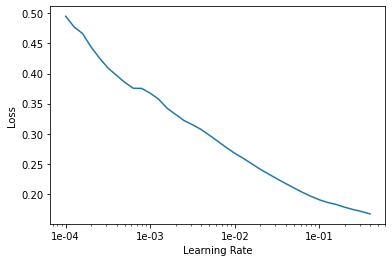

In [23]:
learn.lr_find(start_lr = 1e-05,end_lr = 1e+05, num_it = 100)
learn.recorder.plot()

In [24]:
#Fitting data and training the network
learn.fit_one_cycle(25)

epoch,train_loss,valid_loss,root_mean_squared_error,r2_score,time
0,0.454992,0.096628,0.309774,-4.775156,00:00
1,0.329435,0.122250,0.349421,-6.668114,00:00
2,0.259872,0.117313,0.339122,-5.615991,00:00
3,0.209001,0.100372,0.316582,-5.779727,00:00
4,0.171014,0.047118,0.217056,-2.094960,00:00
5,0.139848,0.030856,0.175576,-1.068910,00:00
6,0.115725,0.016354,0.127808,-0.100512,00:00
7,0.096820,0.011441,0.104944,0.105365,00:00
8,0.081804,0.011503,0.107247,0.246420,00:00
9,0.069885,0.012625,0.112226,0.218520,00:00


In [25]:
#Display Predictions On Training Data
learn.show_results(ds_type=DatasetType.Train,rows = 5)

WQC,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,target,prediction
Good,0.7649,0.0400,4.8739,1.7349,4.3862,6.4393,4.7163,1.5509,0.7282,2.8666,6.0109,-0.2316,4.5551,-0.1989,0.516793,[0.561231]
Excellent,0.5105,1.4884,-0.7660,-0.2395,-0.5958,-0.7439,-0.9021,-0.5672,-0.4727,-0.5297,-0.7702,-0.1755,-0.8143,-0.5067,0.18669778,[0.220704]
Excellent,-1.0157,1.4693,0.2729,0.8711,0.3278,-0.4176,0.3748,0.0682,-0.2147,-0.4683,-0.4307,-0.0628,0.2892,0.2243,0.28449556,[0.25302]
Excellent,-0.1254,-1.1035,-0.6176,-0.8565,-0.7791,-0.7477,0.6302,-0.1436,-0.1391,-0.3266,-0.7979,-0.6200,-0.1643,-0.0899,0.26604912,[0.24947]
Excellent,0.7649,1.1168,-0.2218,-0.3629,-0.1200,-0.6283,-0.1359,-0.7790,-0.8152,2.0636,-0.6593,-0.5175,0.2203,-0.2374,0.29622987,[0.300946]


In [26]:
#Display Predictions On Validation Data
learn.show_results(ds_type=DatasetType.Valid)

WQC,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,target,prediction
Excellent,0.6632,1.3740,0.2977,1.2413,0.0102,0.3153,0.6302,0.7036,-0.6951,-0.4683,0.3684,-0.4537,-0.7097,-0.4373,0.24491613,[0.247289]
Excellent,0.3579,1.7552,0.1740,1.7349,-0.1060,0.2164,0.3748,0.9154,0.3146,-0.2014,-0.0935,-0.5253,-0.5764,-0.3284,0.25188896,[0.250183]
Excellent,1.2737,1.5646,0.7676,1.2413,0.8456,0.4906,0.5025,-0.1436,-0.2547,-0.1778,0.5994,-0.5797,-0.1540,-0.3079,0.28452092,[0.239115]
Excellent,1.5280,0.8976,0.0255,0.5009,0.0619,-0.0222,0.2472,0.7036,-0.0946,-0.2061,0.1028,-0.4541,-0.6820,0.2235,0.3322436,[0.338167]
Excellent,-0.5070,-0.2459,0.3471,1.4881,0.4678,-0.6115,-0.1359,0.9154,0.9195,1.9455,-0.5208,-0.0898,-0.4760,-0.4874,0.27245635,[0.265422]


In [27]:
#Getting The Training And Validation Errors

tr = learn.validate(learn.data.train_dl)
va = learn.validate(learn.data.valid_dl)
print("The Metrics used In Evaluating The Network:", str(learn.metrics))

print("\nThe calculated RMSE & R-Squared For The Training Set :", tr[1:])
print("\nThe calculated RMSE & R-Squared For The Validation Set :", va[1:])

The Metrics used In Evaluating The Network: [<function root_mean_squared_error at 0x7fad7e189ef0>, <function r2_score at 0x7fad7e18e0e0>]

The calculated RMSE & R-Squared For The Training Set : [tensor(0.0385), tensor(0.8965)]

The calculated RMSE & R-Squared For The Validation Set : [tensor(0.0819), tensor(0.5931)]


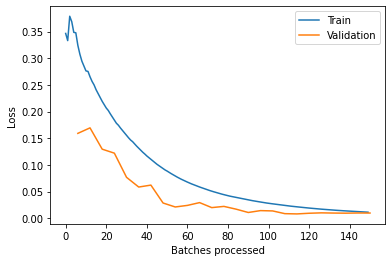

In [43]:
#Plotting The losses for training and validation
learn.recorder.plot_losses()

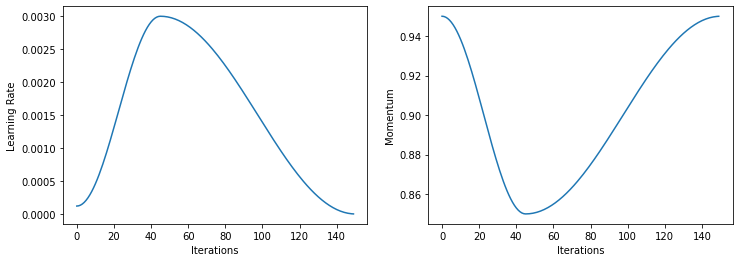

In [28]:
#Plotting Momentum & Learning Rate
learn.recorder.plot_lr(show_moms=True)

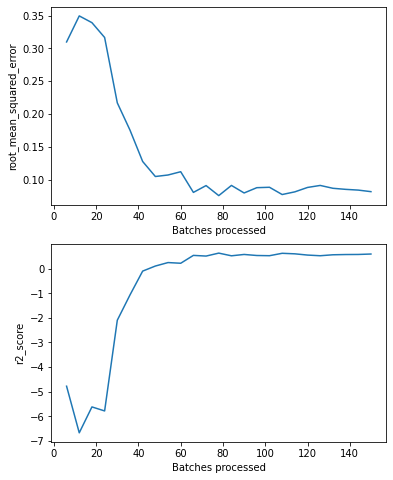

In [29]:
#Plotting the metrics of evaluation
learn.recorder.plot_metrics()

In [30]:
val = train_data.tail(97)

In [31]:
#Converting the prediction to DataFrame for Comparing
val_preds = learn.get_preds(ds_type=DatasetType.Valid)[0]
val_preds = [i[0] for i in val_preds.tolist()] 
val['Predicted'] = val_preds

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [32]:
val.head()

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI,WQC,Predicted
390,8.06,8.9,123.0,80.0,189.3,10.17,52.0,30.0,1.36,0.288,16.7,0.485000,5.049510,0.019822,0.244916,Excellent,0.247289
391,7.94,9.3,118.0,88.0,181.0,9.64,48.0,32.0,3.63,0.401,12.7,0.354665,6.732680,0.036800,0.251889,Excellent,0.250183
392,8.30,9.1,142.0,80.0,249.0,11.11,50.0,22.0,2.35,0.411,18.7,0.255837,12.064375,0.040000,0.284521,Excellent,0.239115
393,8.40,8.4,112.0,68.0,193.0,8.36,46.0,30.0,2.71,0.399,14.4,0.484209,5.400000,0.122880,0.332244,Excellent,0.338167
394,7.60,7.2,125.0,84.0,222.0,5.20,40.0,32.0,4.99,1.310,9.0,1.147000,8.000000,0.012000,0.272456,Excellent,0.265422


In [33]:
import numpy as np
Y_true = val['WPI']
pred = val['Predicted']


#RMSLE
error = np.square(np.log10(pred + 1) - np.log10(Y_true +1)).mean() ** 0.5

score = 1 - error
print("SCORE For Validation : ",score)

SCORE For Validation :  0.9759134192725971


In [34]:
print("R-Squared For Validation Set : ", r2_score(learn.get_preds(ds_type=DatasetType.Valid)[0], learn.get_preds(ds_type=DatasetType.Valid)[1]))

R-Squared For Validation Set :  tensor(0.6446)


In [35]:
print("\nRMSE For Validation Set : ",root_mean_squared_error(learn.get_preds(ds_type=DatasetType.Valid)[0], learn.get_preds(ds_type=DatasetType.Valid)[1]))



RMSE For Validation Set :  tensor(0.0821)
